##Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [2]:
data_test = pd.read_csv('/content/drive/MyDrive/Kaggle Data/Kaggle - House Price Prediction/test.csv')

In [3]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
data_test.drop(["Id","MSSubClass","LotArea","OverallCond","BsmtFinSF2","BsmtUnfSF","LowQualFinSF","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold"], axis=1, inplace=True)

In [5]:
data_test.drop(["GarageYrBlt","1stFlrSF","TotRmsAbvGrd","GarageArea"], axis=1, inplace=True)

In [6]:
data_test.drop(["Alley"], axis=1, inplace=True)

In [7]:
data_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
data_test.shape

(1459, 53)

In [12]:
#check null values
data_test.isnull().sum()

MSZoning          0
LotFrontage       0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
2ndFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       1
Functional        2
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageFinish     78
GarageCars        1
GarageQual       78
GarageCond       78
PavedDrive        0
WoodDeckSF        0


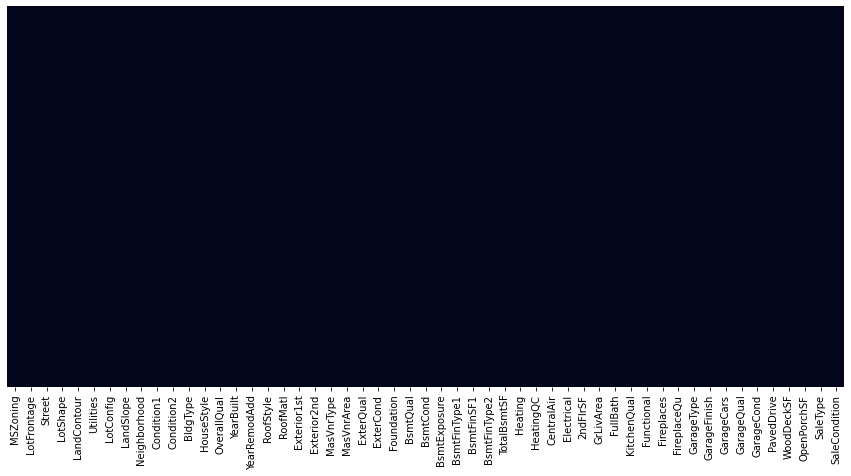

In [22]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False)

In [10]:
data_test['LotFrontage']=data_test['LotFrontage'].fillna(data_test['LotFrontage'].mean())
data_test['MSZoning']=data_test['MSZoning'].fillna(data_test['MSZoning'].mode()[0])

In [18]:
data_test['BsmtCond']=data_test['BsmtCond'].fillna(data_test['BsmtCond'].mode()[0])
data_test['BsmtQual']=data_test['BsmtQual'].fillna(data_test['BsmtQual'].mode()[0])
data_test['FireplaceQu']=data_test['FireplaceQu'].fillna(data_test['FireplaceQu'].mode()[0])
data_test['GarageType']=data_test['GarageType'].fillna(data_test['GarageType'].mode()[0])
data_test['GarageFinish']=data_test['GarageFinish'].fillna(data_test['GarageFinish'].mode()[0])
data_test['GarageQual']=data_test['GarageQual'].fillna(data_test['GarageQual'].mode()[0])
data_test['GarageCond']=data_test['GarageCond'].fillna(data_test['GarageCond'].mode()[0])
data_test['MasVnrType']=data_test['MasVnrType'].fillna(data_test['MasVnrType'].mode()[0])
data_test['MasVnrArea']=data_test['MasVnrArea'].fillna(data_test['MasVnrArea'].mode()[0])
data_test['BsmtExposure']=data_test['BsmtExposure'].fillna(data_test['BsmtExposure'].mode()[0])
data_test['BsmtFinType2']=data_test['BsmtFinType2'].fillna(data_test['BsmtFinType2'].mode()[0])
data_test['Utilities']=data_test['Utilities'].fillna(data_test['Utilities'].mode()[0])
data_test['Exterior1st']=data_test['Exterior1st'].fillna(data_test['Exterior1st'].mode()[0])
data_test['Exterior2nd']=data_test['Exterior2nd'].fillna(data_test['Exterior2nd'].mode()[0])
data_test['BsmtFinType1']=data_test['BsmtFinType1'].fillna(data_test['BsmtFinType1'].mode()[0])
data_test['BsmtFinSF1']=data_test['BsmtFinSF1'].fillna(data_test['BsmtFinSF1'].mean())
data_test['TotalBsmtSF']=data_test['TotalBsmtSF'].fillna(data_test['TotalBsmtSF'].mean())
data_test['KitchenQual']=data_test['KitchenQual'].fillna(data_test['KitchenQual'].mode()[0])
data_test['Functional']=data_test['Functional'].fillna(data_test['Functional'].mode()[0])
data_test['GarageCars']=data_test['GarageCars'].fillna(data_test['GarageCars'].mean())
data_test['SaleType']=data_test['SaleType'].fillna(data_test['SaleType'].mode()[0])

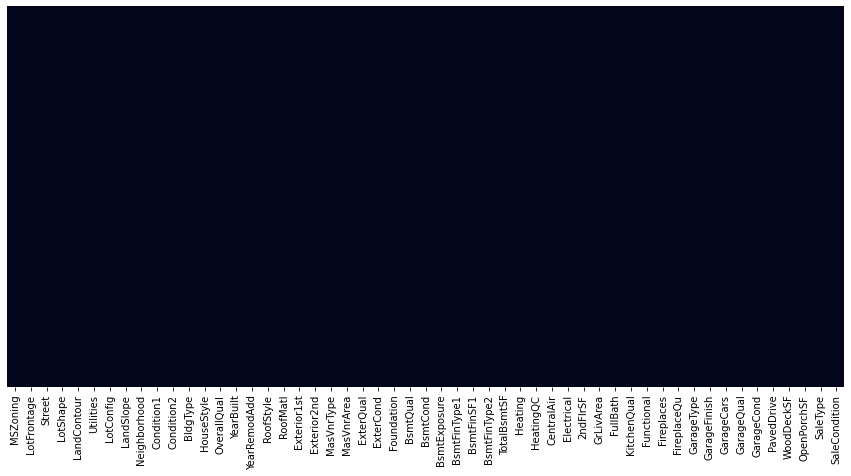

In [23]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False)

In [20]:
data_test.shape

(1459, 53)

In [25]:
data_test.to_csv('formulatedtest.csv',index=False)